In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
df = pd.read_csv('smartphone_cleaned_v5.csv')
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,resolution,refrest_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12,256,6.70,1440 x 3216,120,3,1,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6,128,6.59,1080 x 2412,120,3,1,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4,64,6.60,1080 x 2408,90,3,1,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6,128,6.55,1080 x 2400,120,3,1,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6,128,6.70,1080 x 2412,120,3,1,android,108.0,16.0,0,NaN


In [ ]:
temp_df = df[df['num_front_cameras'] == 'missing']
df.loc[temp_df.index,'num_front_cameras'] = np.nan
df['num_front_cameras'] = df['num_front_cameras'].astype('float')

In [6]:
df.shape

(980, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

In [8]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
resolution                     0
refrest_rate                   0
num_rear_cameras               0
num_front_cameras              0
os                             0
primary_camera_rear            0
primary_camera_front           4
extended_memory_available      0
extended_upto                480
dtype: int64

<AxesSubplot:>

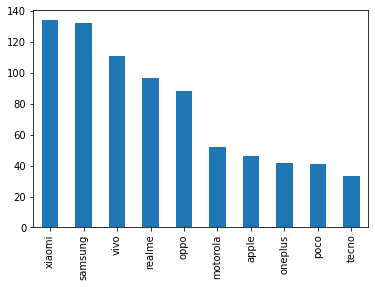

In [16]:
# brand_name
# plot a graph of top 5 brands
df.brand_name.value_counts().head(10).plot(kind='bar')

<AxesSubplot:ylabel='brand_name'>

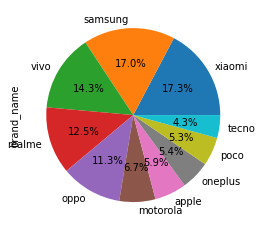

In [17]:
# pie chart
df.brand_name.value_counts().head(10).plot(kind='pie',autopct='%0.1f%%')

In [18]:
# model
df.model.nunique()

980

In [23]:
# price -> not normal, outliers
df.price.describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

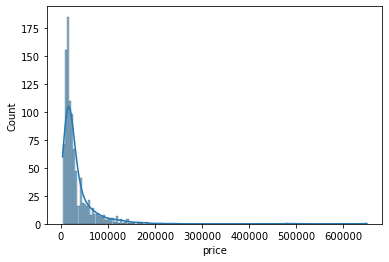

In [24]:
sns.histplot(df,x='price',kde=True)

In [25]:
df.price.skew()

6.591790999665567

<AxesSubplot:xlabel='price'>

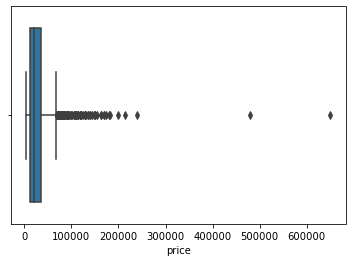

In [28]:
sns.boxplot(data=df,x='price')

In [29]:
# this give us the glimpse that these phones have crazy high prices 
# and there is also no explanation for it in a form of a feature
# these phones have diamonds or gold ingrave in it if we somehow have
# a column like gold or diamond then we might have kept the columns
df[df['price']>250000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,resolution,refrest_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,8.0,1.50,2275.0,0,NaN,2,64,4.70,1080 x 1920,60,1,1,android,13.0,2.1,0,NaN
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,snapdragon,8.0,3.20,4700.0,1,66.0,12,512,6.74,1212 x 2616,120,3,1,other,50.0,13.0,1,256.0
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,snapdragon,8.0,2.80,4000.0,1,27.0,8,256,6.39,1080 x 2340,60,3,1,android,48.0,20.0,0,NaN
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,kirin,8.0,2.86,4500.0,1,NaN,12,512,6.53,1176 x 2400,60,4,2,android,40.0,32.0,1,256.0


In [30]:
df.price.isnull().sum()

0

In [32]:
# ratings
df.rating.describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

<AxesSubplot:xlabel='rating', ylabel='Count'>

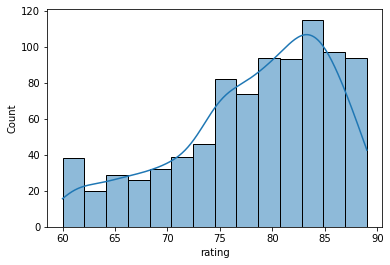

In [33]:
sns.histplot(df,x='rating',kde=True)

In [34]:
df.rating.skew()

-0.6989993034105535

<AxesSubplot:xlabel='rating'>

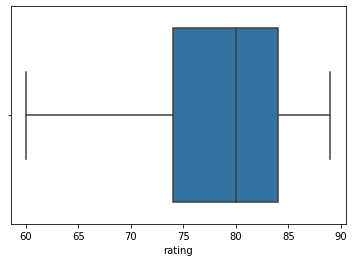

In [35]:
sns.boxplot(data=df,x='rating')

<AxesSubplot:ylabel='has_5g'>

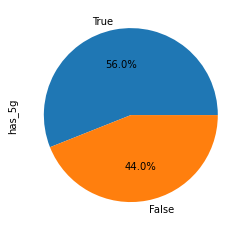

In [40]:
df.has_5g.value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='has_nfc'>

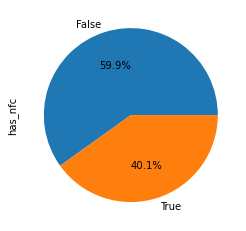

In [41]:
df.has_nfc.value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='has_ir_blaster'>

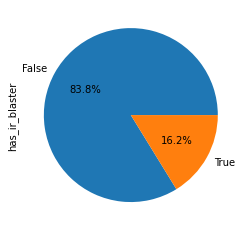

In [42]:
df.has_ir_blaster.value_counts().plot(kind='pie',autopct='%0.1f%%')

In [43]:
df[df['has_ir_blaster']==True]['brand_name'].value_counts()

xiaomi     109
poco        30
iqoo         6
huawei       6
vivo         4
redmi        2
honor        1
samsung      1
Name: brand_name, dtype: int64

<AxesSubplot:ylabel='processor_brand'>

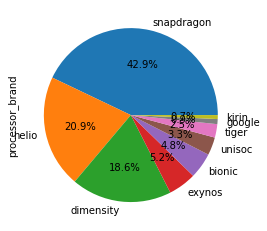

In [47]:
df['processor_brand'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='num_cores'>

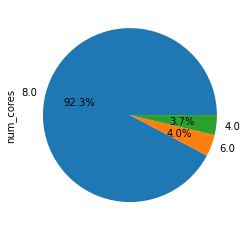

In [48]:
# num_cores
# do you think this feature will help in prediction
# no since most of the values are octacore it don't contribute enough info
df['num_cores'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='fast_charging_available'>

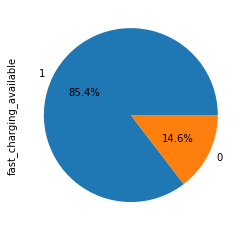

In [50]:
df['fast_charging_available'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='ram_capacity'>

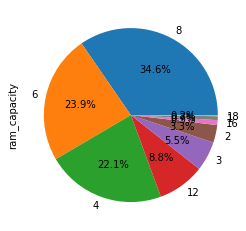

In [51]:
df['ram_capacity'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='internal_memory'>

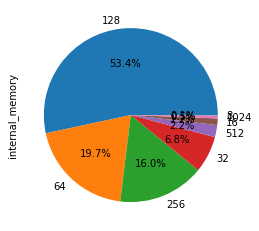

In [52]:
df['internal_memory'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='refrest_rate'>

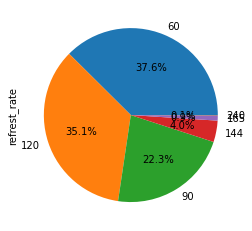

In [53]:
df['refrest_rate'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [54]:
df['refrest_rate'].value_counts()

60     368
120    344
90     219
144     39
165      9
240      1
Name: refrest_rate, dtype: int64

<AxesSubplot:ylabel='None'>

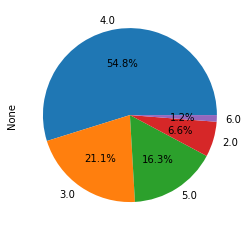

In [78]:
(df['num_rear_cameras'] + df['num_front_cameras']).value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='os'>

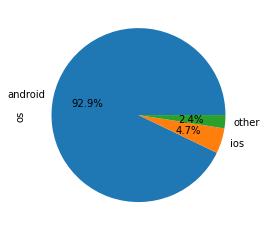

In [79]:
(df['os']).value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='extended_memory_available'>

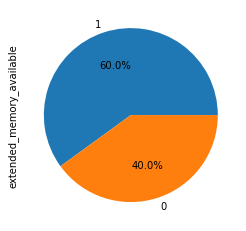

In [80]:
(df['extended_memory_available']).value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='extended_upto'>

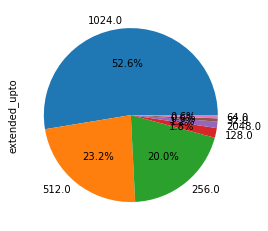

In [81]:
(df['extended_upto']).value_counts().plot(kind='pie',autopct='%0.1f%%')

In [95]:
def plot_graph(column_name):
    
    sns.displot(kind='hist',kde=True, data=df, x=column_name, label=column_name)
    sns.catplot(kind='box',data = df, x=column_name)

In [96]:
column = df.select_dtypes(include=['float64','int64']).iloc[:,[3,4,6,9,13,14,16]].columns
column

Index(['processor_speed', 'battery_capacity', 'fast_charging', 'screen_size',
       'primary_camera_rear', 'primary_camera_front', 'extended_upto'],
      dtype='object')

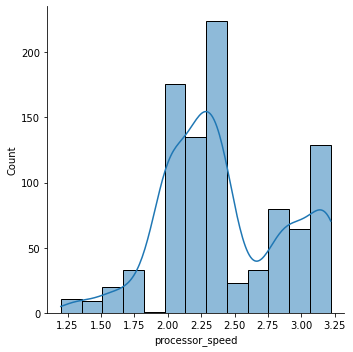

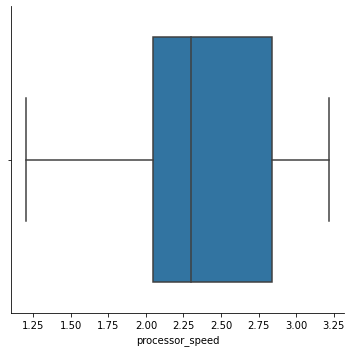

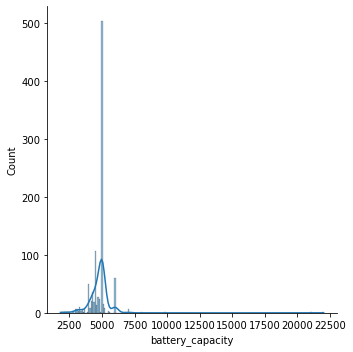

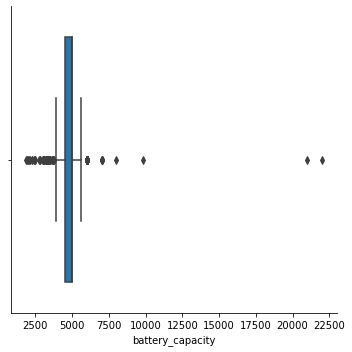

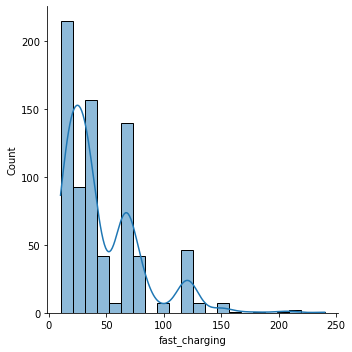

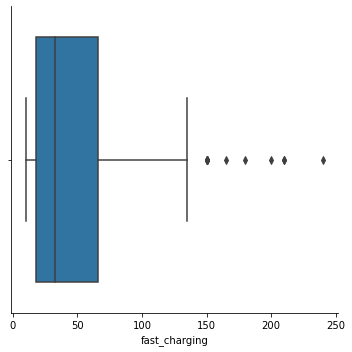

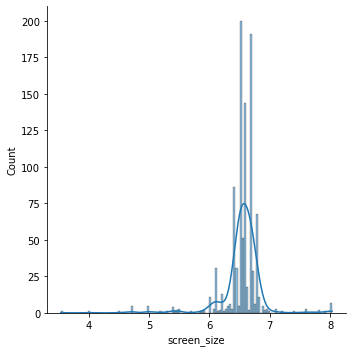

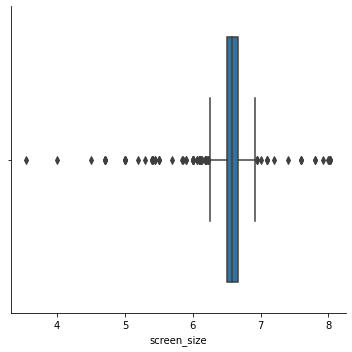

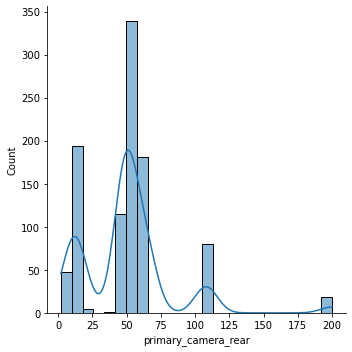

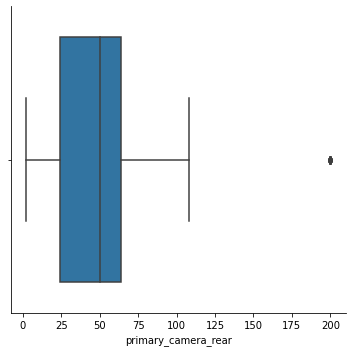

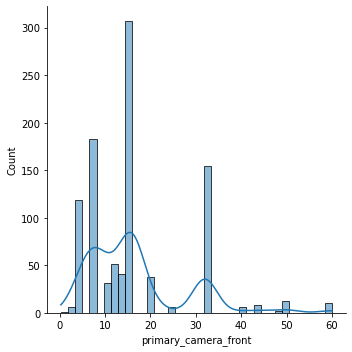

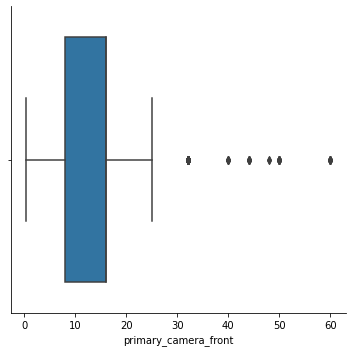

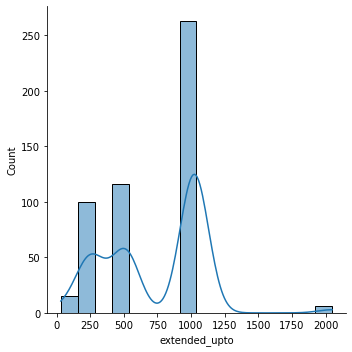

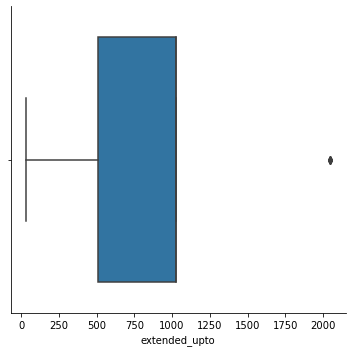

In [97]:
for i in column:
    plot_graph(i)

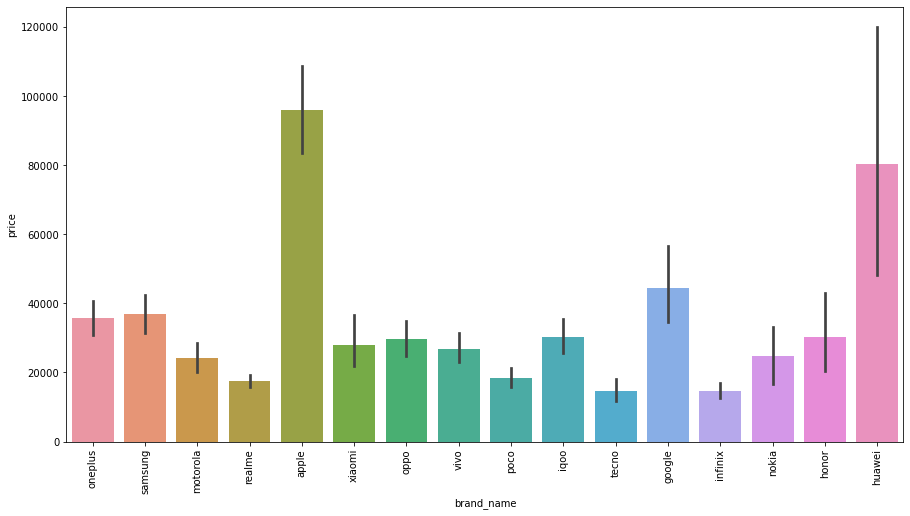

In [110]:
# Bivarate analysis

x = df.groupby('brand_name')['brand_name'].count()>10
temp_df = df[df['brand_name'].isin(x[x].index)]

plt.figure(figsize=(15,8))
sns.barplot(data=temp_df,x='brand_name',y='price')
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='rating', ylabel='price'>

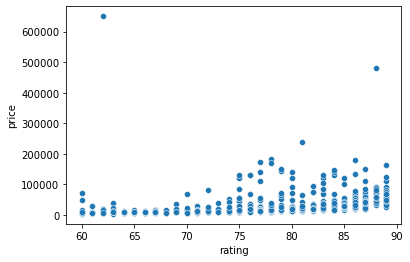

In [111]:
sns.scatterplot(data=df,x='rating',y='price')

<AxesSubplot:xlabel='has_5g', ylabel='price'>

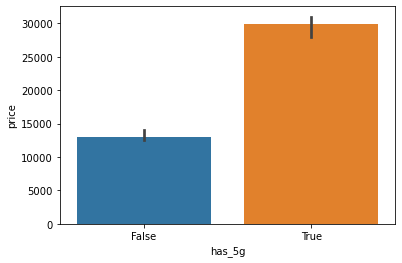

In [116]:
sns.barplot(data=temp_df,x='has_5g',y='price',estimator=np.median)

<AxesSubplot:xlabel='has_ir_blaster', ylabel='price'>

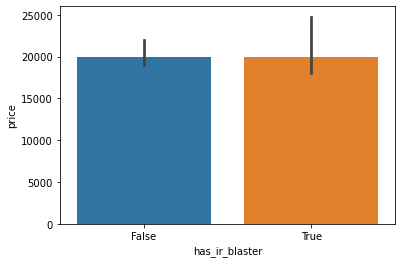

In [120]:
sns.barplot(data=temp_df,x='has_ir_blaster',y='price',estimator=np.median)

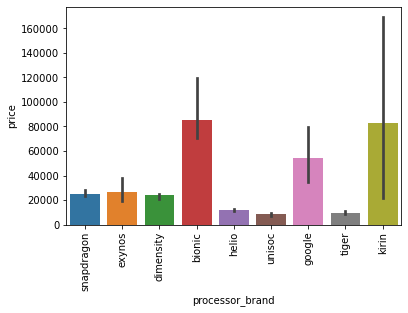

In [123]:
sns.barplot(data=temp_df,x='processor_brand',y='price',estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

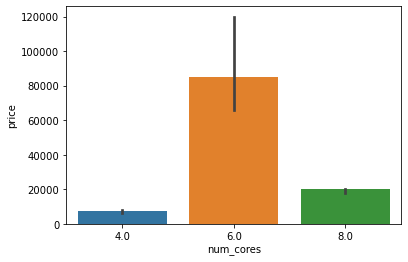

In [124]:
sns.barplot(data=temp_df,x='num_cores',y='price',estimator=np.median)
plt.show()

In [125]:
pd.crosstab(df['num_cores'],df['os'])

os,android,ios,other
num_cores,,,
4.0,33,1,2
6.0,0,39,0
8.0,876,1,22


<AxesSubplot:xlabel='processor_speed', ylabel='price'>

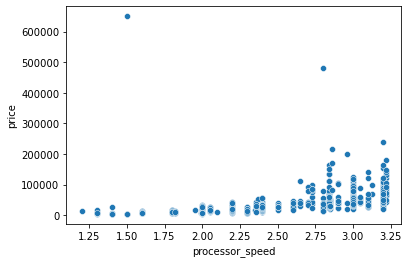

In [126]:
sns.scatterplot(data=df,x='processor_speed',y='price')

<AxesSubplot:xlabel='screen_size', ylabel='price'>

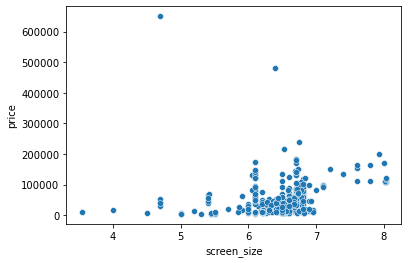

In [127]:
sns.scatterplot(data=df,x='screen_size',y='price')

In [131]:
df.corr()['price']

price                        1.000000
rating                       0.283504
has_5g                       0.305066
has_nfc                      0.470951
has_ir_blaster              -0.015807
num_cores                   -0.048561
processor_speed              0.474049
battery_capacity            -0.159232
fast_charging_available      0.116739
fast_charging                0.277591
ram_capacity                 0.386002
internal_memory              0.557168
screen_size                  0.113253
refrest_rate                 0.244115
num_rear_cameras             0.127643
num_front_cameras            0.115228
primary_camera_rear          0.092095
primary_camera_front         0.162906
extended_memory_available   -0.436643
extended_upto                0.091945
Name: price, dtype: float64

In [132]:
df.isna().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
resolution                     0
refrest_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                             0
primary_camera_rear            0
primary_camera_front           4
extended_memory_available      0
extended_upto                480
dtype: int64

In [133]:
df.corr()['rating']

price                        0.283504
rating                       1.000000
has_5g                       0.596087
has_nfc                      0.474754
has_ir_blaster               0.156421
num_cores                    0.199741
processor_speed              0.628446
battery_capacity            -0.015581
fast_charging_available      0.542814
fast_charging                0.527613
ram_capacity                 0.757613
internal_memory              0.481070
screen_size                  0.298272
refrest_rate                 0.610795
num_rear_cameras             0.515531
num_front_cameras            0.131480
primary_camera_rear          0.562046
primary_camera_front         0.577940
extended_memory_available   -0.427563
extended_upto                0.346761
Name: rating, dtype: float64

In [134]:
# knn imputer
df.shape

(980, 25)

In [141]:
x_df = df.select_dtypes(include=['int64','float64']).drop(columns='price')

In [142]:
from sklearn.impute import KNNImputer

In [143]:
imputer = KNNImputer(n_neighbors=5)

In [144]:
x_df_values = imputer.fit_transform(x_df)

In [149]:
x_df = pd.DataFrame(x_df_values,columns=x_df.columns)

In [150]:
x_df['price'] = df['price']

In [156]:
a = x_df.corr()['price'].reset_index()
b = df.corr()['price'].reset_index()

In [158]:
b.merge(a,on='index')

,index,price_x,price_y
0,price,1.000000,1.000000
1,rating,0.283504,0.341803
2,num_cores,-0.048561,-0.055949
3,processor_speed,0.474049,0.488426
4,battery_capacity,-0.159232,-0.166257
5,fast_charging_available,0.116739,0.116739
6,fast_charging,0.277591,0.220643
7,ram_capacity,0.386002,0.386002
8,internal_memory,0.557168,0.557168
9,screen_size,0.113253,0.113253


In [164]:
pd.get_dummies(df,columns=['brand_name','processor_brand','os'],drop_first=True).corr()['price']

price                         1.000000
rating                        0.283504
has_5g                        0.305066
has_nfc                       0.470951
has_ir_blaster               -0.015807
num_cores                    -0.048561
processor_speed               0.474049
battery_capacity             -0.159232
fast_charging_available       0.116739
fast_charging                 0.277591
ram_capacity                  0.386002
internal_memory               0.557168
screen_size                   0.113253
refrest_rate                  0.244115
num_rear_cameras              0.127643
num_front_cameras             0.115228
primary_camera_rear           0.092095
primary_camera_front          0.162906
extended_memory_available    -0.436643
extended_upto                 0.091945
brand_name_asus               0.090566
brand_name_blackview         -0.019033
brand_name_blu               -0.014180
brand_name_cat               -0.014173
brand_name_cola              -0.014173
brand_name_doogee        